### **Начало проекта**

**Введение в проект**


Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


#### **Шаг 1. Открываем файлы с данными и изучаем общую информацию**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import os
from scipy import stats as st
from sklearn import datasets
import seaborn as sns
# import altair as alt

In [57]:
pth1 = '/Users/ikashkovskiy/Desktop/YANDEX P/data/megaline/calls.csv' 
pth2 = '/datasets/calls.csv'

if os.path.exists(pth1):
    df_calls = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_calls = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [58]:
pth3 = '/Users/ikashkovskiy/Desktop/YANDEX P/data/megaline/internet.csv' 
pth4 = '/datasets/internet.csv'

if os.path.exists(pth3):
    df_internet = pd.read_csv(pth3)
elif os.path.exists(pth4):
    df_internet = pd.read_csv(pth4) 
else:
    print('Something is wrong')

In [59]:
pth5 = '/Users/ikashkovskiy/Desktop/YANDEX P/data/megaline/messages.csv' 
pth6 = '/datasets/messages.csv'

if os.path.exists(pth5):
    df_messages = pd.read_csv(pth5)
elif os.path.exists(pth6):
    df_messages = pd.read_csv(pth6)  
else:
    print('Something is wrong')

In [60]:
pth7 = '/Users/ikashkovskiy/Desktop/YANDEX P/data/megaline/tariffs.csv' 
pth8 = '/datasets/tariffs.csv'

if os.path.exists(pth7):
    df_tariffs = pd.read_csv(pth7)
elif os.path.exists(pth8):
    df_tariffs = pd.read_csv(pth8) 
else:
    print('Something is wrong')

In [61]:
pth9 = '/Users/ikashkovskiy/Desktop/YANDEX P/data/megaline/users.csv' 
pth10 = '/datasets/users.csv'

if os.path.exists(pth7):
    df_users = pd.read_csv(pth9)
elif os.path.exists(pth8):
    df_users = pd.read_csv(pth10) 
else:
    print('Something is wrong')

In [62]:
#df_users.info()

In [63]:
#df_messages.info()

In [64]:
#df_internet.info()

In [65]:
#df_calls.info()

In [66]:
#df_tariffs.info()

**Данные получены, нужно изменить тип данных дат и удалить лишний столбец в df_internet**

### **Шаг 2. Подготовка данных**

In [67]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [68]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [69]:
#исправил тип данных столбцов с датами на datetime64

In [70]:
#добавляем столбец с месяцем
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['month'] = df_messages['message_date'].dt.month

In [71]:
#добавляем столбец с месяцем
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['month'] = df_internet['session_date'].dt.month

In [72]:
#удаляем лишний столбец
df_internet = df_internet.drop('Unnamed: 0', axis=1)
#df_internet.info()

In [73]:
#добавляем столбец с месяцем
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['month'] = df_calls['call_date'].dt.month

In [74]:
df_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


In [75]:
#округляем минуты
df_calls['duration'] = np.ceil(df_calls['duration'])

In [76]:
#сумма звонков и минут по месяцам для каждого пользователя
df_calls_sum = df_calls.pivot_table(index=['user_id', 'month'],aggfunc={'call_date':'count', 'duration':sum})
df_calls_sum.columns = ['calls_sum', 'minutes_sum']
df_calls_sum.head(10)

calls_sum  minutes_sum
user_id month                        
1000    5             22        159.0
        6             43        172.0
        7             47        340.0
        8             52        408.0
        9             58        466.0
        10            57        350.0
        11            43        338.0
        12            46        333.0
1001    11            59        430.0
        12            63        414.0

In [77]:
#сумма мб и сессий по месяцам для каждого пользователя
df_internet_sum = df_internet.pivot_table(index=['user_id', 'month'],aggfunc={'session_date':'count', 'mb_used':sum})
df_internet_sum.columns = ['mb_used_sum', 'session_sum']
#df_internet_sum.head(10)

In [78]:
#сумма сообщений по месяцам для каждого пользователя
df_messages_sum = df_messages.pivot_table(index=['user_id', 'month'], aggfunc={'id':'count'})
df_messages_sum.columns = ['message_sum']
#df_messages_sum.head(10)

**Исправил строки с датами на правильный тип данных, удалил не нужный столбец, округлил минуты, выделил столбец суммами минут, сообщений и траффика по месяцам**

In [79]:
df_sum = df_internet_sum.join([df_messages_sum, df_calls_sum], how="outer").reset_index(level='month')
#df_sum.head()
#df_sum.info()

In [80]:
df_sum['mb_used_sum'] = df_sum['mb_used_sum'].fillna(0)
df_sum['calls_sum'] = df_sum['calls_sum'].fillna(0)
df_sum['minutes_sum'] = df_sum['minutes_sum'].fillna(0)
df_sum['message_sum'] = df_sum['message_sum'].fillna(0)
df_sum['session_sum'] = df_sum['session_sum'].fillna(0)
#заменяем пропуски нулями
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1000 to 1499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        3214 non-null   int64  
 1   mb_used_sum  3214 non-null   float64
 2   session_sum  3214 non-null   float64
 3   message_sum  3214 non-null   float64
 4   calls_sum    3214 non-null   float64
 5   minutes_sum  3214 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 175.8 KB


In [81]:
df_sum = df_sum.drop('session_sum', axis=1)

In [82]:
df = df_users.merge(df_sum, on='user_id', how='right')

In [83]:
df_month_income = df.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis='columns')
#убираем лишние столбцы

In [84]:
df_month_income['mb_used_sum'] = df_month_income['mb_used_sum'] / 1024
#меняем мб на гб

In [85]:
df_month_income['mb_used_sum'] = np.ceil(df_month_income['mb_used_sum'])
#округляем в большую сторону по условиям тарифов

In [86]:
df_month_income = df_month_income.rename(columns={'mb_used_sum' : 'gb_used_sum'})

In [87]:
#добавим тарифы
df_tariffs = df_tariffs.rename(columns={'tariff_name' : 'tariff'})

In [88]:
df_month_income = df_month_income.merge(df_tariffs, on='tariff')

In [89]:
df_month_income = df_month_income.rename(columns={'mb_per_month_included' : 'gb_per_month_included'})

In [90]:
df_month_income['gb_per_month_included'] = df_month_income['gb_per_month_included'] / 1024
#меняем мб на гб

In [91]:
df_month_income = df_month_income.astype({'message_sum': np.int64, 'gb_used_sum': np.int64, 
                'calls_sum': np.int64, 'minutes_sum': np.int64, 'gb_per_month_included': np.int64})
#df_month_income

**Таблица с помесячной выручкой с каждого пользователя**

In [92]:
#функция для подсчетов суммы к оплате каждый месяц для клиентов 
#с учетом перерасходов услуг сверх включенных в тариф
def income_per_month(row):
    
    overlimit_min = 0
    overlimit_message = 0
    overlimit_gb = 0
    tarrif_cost = row['rub_monthly_fee']
    message_sum = row['message_sum']
    gb_used_sum = row['gb_used_sum']
    minutes_sum = row['minutes_sum']
    messages_included = row['messages_included']
    gb_per_month_included = row['gb_per_month_included']
    minutes_included = row['minutes_included']
    rub_monthly_fee = row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']
    
    if message_sum > messages_included:
        overlimit_message += (message_sum - messages_included) * rub_per_message
    if gb_used_sum > gb_per_month_included:
        overlimit_gb += (gb_used_sum - gb_per_month_included) * rub_per_gb
    if minutes_sum > minutes_included:
        overlimit_message += (minutes_sum - minutes_included) * rub_per_minute
    return overlimit_message + overlimit_min + overlimit_gb + tarrif_cost

df_month_income['total_income'] = df_month_income.apply(income_per_month, axis=1)
#добавляем столбец в таблицу с итогами

In [93]:
#проверяем
#df_month_income

### **Шаг 3. Проанализируем данные Опишем поведение клиентов оператора, исходя из выборки**

In [94]:
#Таблица с суммами использованных и оплаченных услуг по месяцам для каждого тарифа
df_month_income_sum = (df_month_income
                .pivot_table(index=['tariff', 'month'],
                             values=['message_sum', 'calls_sum', 'gb_used_sum', 'minutes_sum', 'total_income'],
                             aggfunc = np.sum))

df_month_income_sum = df_month_income_sum.reset_index(level='month')

df_month_income_users = (df_month_income
                .pivot_table(index=['tariff', 'month'],
                             values=['user_id'],
                             aggfunc = "count"))
df_month_income_users = df_month_income_users.reset_index(level='month')

df_month_income_sum = df_month_income_users.merge(df_month_income_sum, on=['tariff', 'month'])
df_month_income_sum

,month,user_id,calls_sum,gb_used_sum,message_sum,minutes_sum,total_income
tariff,,,,,,,
smart,1,34,941,297,620,6931,24525
smart,2,58,2331,687,1397,17324,48001
smart,3,77,4183,1173,2453,30034,89676
smart,4,112,5747,1526,3443,41119,107866
smart,5,141,7789,2243,4762,54618,168849
smart,6,164,9110,2616,5478,64885,197459
smart,7,201,11402,3191,6784,82079,246014
smart,8,235,13860,3933,7905,99045,310340
smart,9,260,15482,4262,8746,111439,324986


**При усредненном анализе используемых услуг в течении года по месяцам:**

*Использую среднее, так как на сумме показателей по месяцам на так очевидны различия между тарифами из-за различия лимитов*

*На тарифе СМАРТ*

- заметен рост колличества сообщений, минут звонков, количества звонков, траффика и стоимости услуг в течении года от января к декабрю в связи с ростом колличества абонентов.

*На тарифе УЛЬТРА*

- явного увеличения использования услуг не наблюдается. Колличество абонентов растет медленно.

In [95]:
df_month_income_mean = df_month_income.pivot_table(index=['tariff'],aggfunc={'message_sum':'mean',
                                                                             'calls_sum':'mean',
                                                                            'gb_used_sum':'mean',
                                                                            'minutes_sum':'mean',
                                                                            'user_id':'count',
                                                                            'total_income':'mean'})
df_month_income_mean

#видно, что в среднем на тарифе "смарт" пользователи не превышают лимиты и платят меньше, 
#при том что стоимость абонентской платы выше почти в 4 раза
#а на тарифе "ультра" превышают и платят за это, в среднем больше, из-за высокой стоимости услуг сверх лимита

,calls_sum,gb_used_sum,message_sum,minutes_sum,total_income,user_id
tariff,,,,,,
smart,58.463437,16.328847,33.384029,417.934948,1289.973531,2229
ultra,73.392893,19.494416,49.363452,526.623350,2070.152284,985


In [96]:
df_ultra = df_month_income.query('tariff == "ultra"')
df_ultra = df_ultra.drop(['messages_included',
                          'gb_per_month_included',
                          'minutes_included',
                          'rub_monthly_fee',
                          'rub_per_gb','rub_per_message','rub_per_minute'], axis='columns')
#df_ultra.describe()

In [97]:
df_smart = df_month_income.query('tariff == "smart"')
df_smart = df_smart.drop(['messages_included',
                          'gb_per_month_included',
                          'minutes_included',
                          'rub_monthly_fee',
                         'rub_per_gb','rub_per_message','rub_per_minute'], axis='columns')
#df_smart.describe()

In [98]:
df_month_income_var = df_month_income.pivot_table(index=['tariff'],aggfunc={'message_sum':np.var,
                                                                             'calls_sum':np.var,
                                                                            'gb_used_sum':np.var,
                                                                            'minutes_sum':np.var,
                                                                            'user_id':'count',
                                                                            'total_income':np.var})
df_month_income_var

#дисперсия

,calls_sum,gb_used_sum,message_sum,minutes_sum,total_income,user_id
tariff,,,,,,
smart,672.876243,33.028705,796.812958,36219.315784,669785.708006,2229
ultra,1928.689990,97.091686,2285.266143,100873.633397,141516.745079,985


In [99]:
df_month_income_std = df_month_income.pivot_table(index=['tariff'],aggfunc={'message_sum':np.std,
                                                                             'calls_sum':np.std,
                                                                            'gb_used_sum':np.std,
                                                                            'minutes_sum':np.std,
                                                                            'user_id':'count',
                                                                            'total_income':np.std})
df_month_income_std

#стандартное отклонение

,calls_sum,gb_used_sum,message_sum,minutes_sum,total_income,user_id
tariff,,,,,,
smart,25.939858,5.747061,28.227876,190.313730,818.404367,2229
ultra,43.916853,9.853511,47.804457,317.606098,376.187114,985


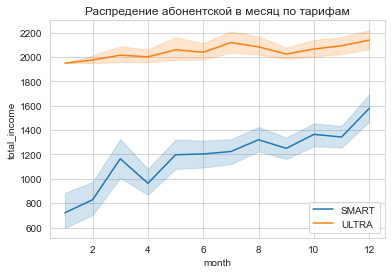

In [100]:
sns.set_style("whitegrid")
ax = sns.lineplot(data=df_smart, x="month", y="total_income", label='SMART')
sns.lineplot(data=df_ultra, x="month", y="total_income", label='ULTRA')
plt.title("Распредение абонентской в месяц по тарифам")
plt.show()

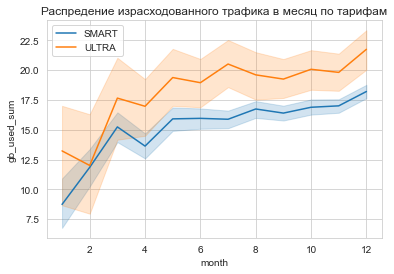

In [101]:
sns.set_style("whitegrid")
ax = sns.lineplot(data=df_smart, x="month", y="gb_used_sum", label='SMART')
sns.lineplot(data=df_ultra, x="month", y="gb_used_sum", label='ULTRA')
plt.title("Распредение израсходованного трафика в месяц по тарифам")
plt.show()

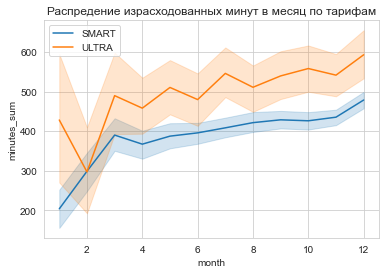

In [118]:
sns.set_style("whitegrid")
ax = sns.lineplot(data=df_smart, x="month", y="minutes_sum", label='SMART')
sns.lineplot(data=df_ultra, x="month", y="minutes_sum", label='ULTRA')
plt.title("Распредение израсходованных минут в месяц по тарифам")
plt.show()

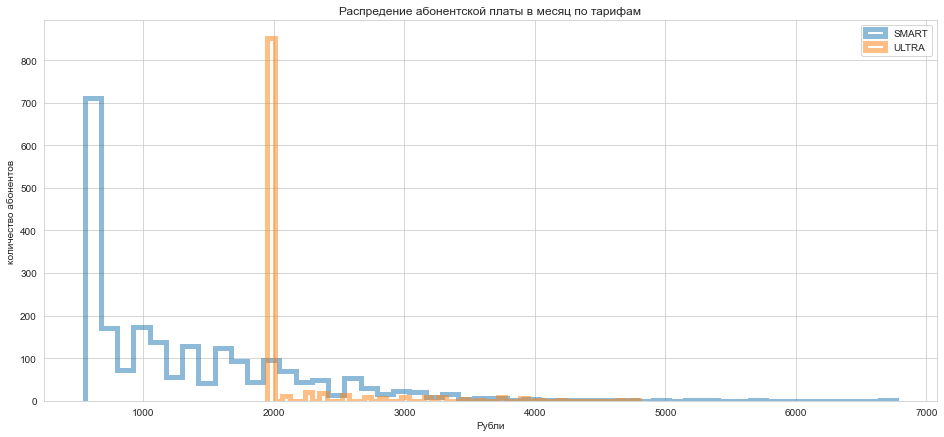

In [104]:
#сравнение по итоговой сумме к оплате по месяцая
ax = df_smart.plot(kind='hist', y='total_income', histtype='step', bins=50, 
                     linewidth=5, alpha=0.5, label='SMART')
df_ultra.plot(kind='hist', y='total_income', histtype='step', bins=50,
linewidth=5, alpha=0.5, label='ULTRA', ax=ax, grid=True, legend=True, figsize=(16,7))
plt.xlabel('Рубли')
plt.ylabel('количество абонентов')
plt.title("Распредение абонентской платы в месяц по тарифам")
plt.show()

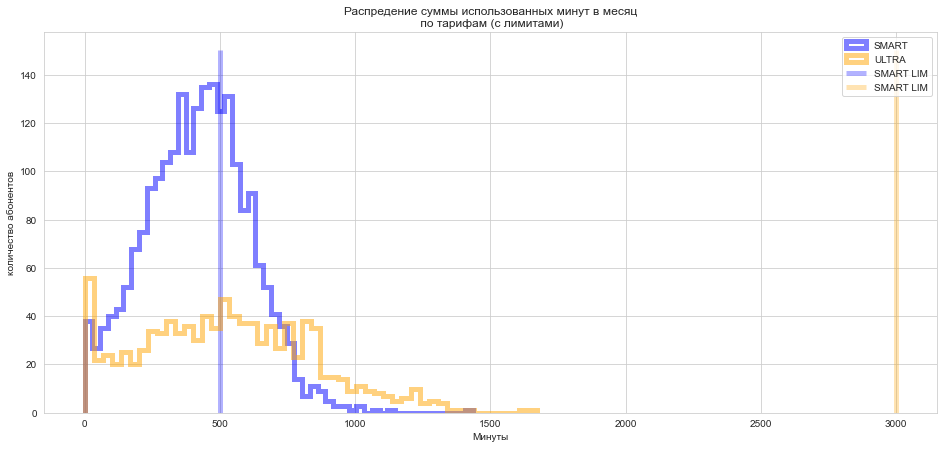

In [105]:
#сравнение по использованным минутам с лимитами
ax = df_smart.plot(kind='hist', y='minutes_sum', histtype='step', bins=50, 
                     linewidth=5, alpha=0.5,color='blue', label='SMART')

df_ultra.plot(kind='hist', y='minutes_sum', histtype='step', bins=50,
linewidth=5, alpha=0.5, label='ULTRA', ax=ax, grid=True, legend=True, color='orange', figsize=(16,7))

ax.vlines(500, 0, 150, color='blue', alpha=0.3, linewidth=5, label='SMART LIM')
ax.vlines(3000, 0, 150, color='orange',alpha=0.3, linewidth=5, label='SMART LIM')
plt.xlabel('Минуты')
plt.ylabel('количество абонентов')
plt.title('Распредение суммы использованных минут в месяц\n по тарифам (с лимитами)')
plt.legend()
plt.show()

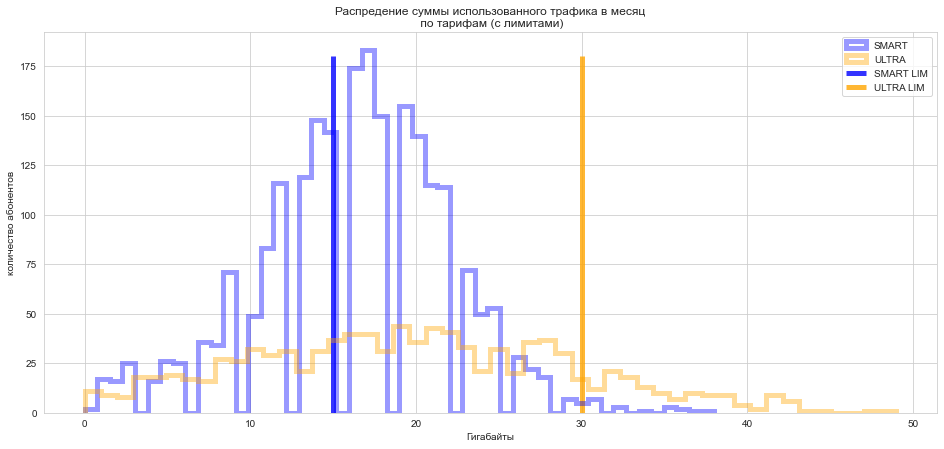

In [106]:
#сравнение по траффику с лимитами
ax = df_smart.plot(kind='hist', y='gb_used_sum', histtype='step', bins=50, 
                     linewidth=5, alpha=0.4, color='blue', label='SMART')

df_ultra.plot(kind='hist', y='gb_used_sum', histtype='step', bins=50,
linewidth=5, alpha=0.4, label='ULTRA', ax=ax, grid=True, legend=True, color='orange', figsize=(16,7))

ax.vlines(15, 0, 180, color='blue', alpha=0.8, linewidth=5, label='SMART LIM')
ax.vlines(30, 0, 180, color='orange',alpha=0.8, linewidth=5, label='ULTRA LIM')
plt.xlabel('Гигабайты')
plt.ylabel('количество абонентов')
plt.title('Распредение суммы использованного трафика в месяц\n по тарифам (с лимитами)')
plt.legend()
plt.show()

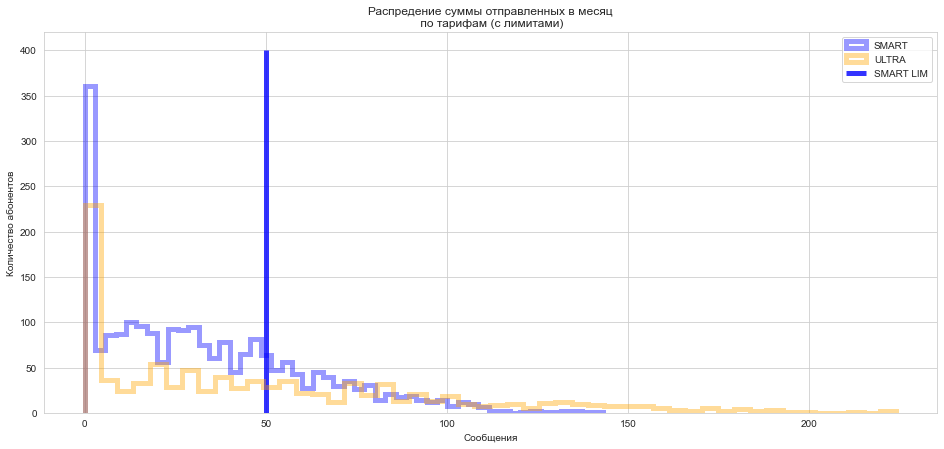

In [107]:
#сравнение по сообщениям с лимитами
ax = df_smart.plot(kind='hist', y='message_sum', histtype='step', bins=50, 
                     linewidth=5, alpha=0.4, label='SMART', color='blue')

df_ultra.plot(kind='hist', y='message_sum', histtype='step', bins=50,
linewidth=5, alpha=0.4, label='ULTRA', color='orange', ax=ax, grid=True, legend=True, figsize=(16,7))

ax.vlines(50, 0, 400, color='blue', alpha=0.8, linewidth=5, label='SMART LIM')
#ax.vlines(1000, 0, 100, color='orange',alpha=0.8, linewidth=5) 
#не влезает в график
plt.xlabel('Сообщения')
plt.ylabel('Количество абонентов')
plt.title('Распредение суммы отправленных в месяц\n по тарифам (с лимитами)')
plt.legend()
plt.show()

**Сравнение распределений по тарифам**

*СМАРТ - синий   /   УЛЬТРА - оранжевый*

/Users/ikashkovskiy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ikashkovskiy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


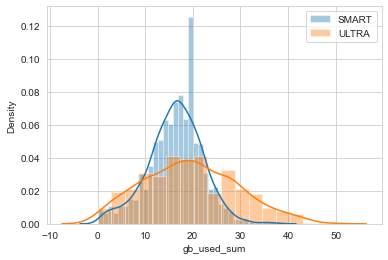

In [125]:
фч = sns_plot = sns.distplot(df_smart['gb_used_sum'], label='SMART')
fig = sns_plot.get_figure()
sns_plot = sns.distplot(df_ultra['gb_used_sum'], label='ULTRA')
fig = sns_plot.get_figure()
plt.legend()
plt.show()

/Users/ikashkovskiy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ikashkovskiy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


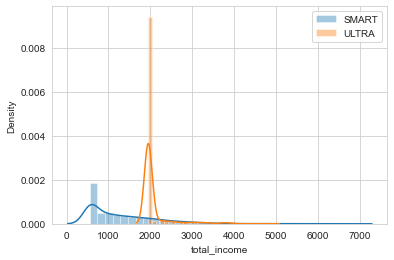

In [128]:
ax = sns_plot = sns.distplot(df_smart['total_income'], label='SMART')
fig = sns_plot.get_figure()
sns_plot = sns.distplot(df_ultra['total_income'], label='ULTRA')
fig = sns_plot.get_figure()
plt.legend()
plt.show()

/Users/ikashkovskiy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ikashkovskiy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


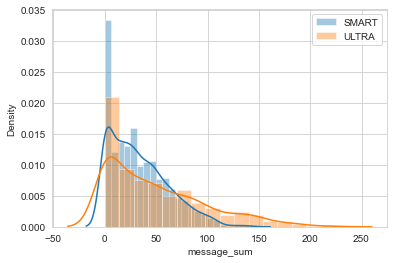

In [129]:
ax = sns_plot = sns.distplot(df_smart['message_sum'], label='SMART')
fig = sns_plot.get_figure()
sns_plot = sns.distplot(df_ultra['message_sum'], label='ULTRA')
fig = sns_plot.get_figure()
plt.legend()
plt.show()

/Users/ikashkovskiy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ikashkovskiy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


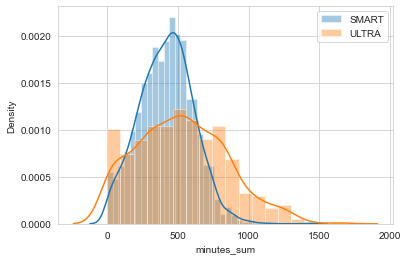

In [130]:
ax = sns_plot = sns.distplot(df_smart['minutes_sum'], label='SMART')
fig = sns_plot.get_figure()
sns_plot = sns.distplot(df_ultra['minutes_sum'], label='ULTRA')
fig = sns_plot.get_figure()
plt.legend()
plt.show()

**Общее распределние - Нормальное**

#### ВЫВОД ПО ШАГУ 3
**В выборке пользователей тарифа СМАРТ почти в 2.5 раза больше чем УЛЬТРА**
Но, по средним показателям можно сказать что, пользователи СМАРТ чаше в среднем превышают лимиты тарифа и платят за это в среднем сумму сопоставимую с 2 абонентскими платами - 1256руб.

С Тарифом УЛЬТРА ситуация другая, так как пользователи почти не превышают лимиты, то редко доплачивают за перерасход и в среднем платят в месяц 2047руб

Так же из анализа данных можно сделать выводы
 - Пользователи УЛЬТРА в среднем больше пользуются услугами связи
 - Пользователи обоих тарифов отправялют мало сообщений
 - Пользователи УЛЬТРА перерасходуют только траффик, его не хватает на обоих тарифах
 - Распределние близко к нормальному 



#### Шаг 4. Проверяем гипотезы
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


#### Гипотеза 1
1. у качестве гипотезы Н0 выбераем утверждение, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны  в качестве гипотезы Н1 - утверждение, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
- Пороговое значение стандартное.
2. Так как проверяем гипотезу о равенстве среднего двух неравных генеральных совокупностей, используем метод .ttest_ind() с условием equal_var=False

In [113]:
#Гипотеза 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются 
# H0 - средние выручки равны, Н1 - средние выручки не равны

smart_ttest = df_smart['total_income']

ultra_ttest = df_ultra['total_income']

alpha = .05

results = st.ttest_ind(smart_ttest, ultra_ttest, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются")
else:
    print("Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны")

p-значение: 4.2606313931076085e-250
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются


#### Гипотеза 2
1. у качестве гипотезы Н0 выбераем утверждение, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов,  в качестве гипотезы Н1 - утверждение, что средняя выручка пользователей из Москвы и пользователей из других регионов отличаются.
- Пороговое значение стандартное.
- Нужно создать таблицу с суммой всех платежей по каждому пользователю.
2. Так как проверяем гипотезу о равенстве среднего двух неравных генеральных совокупностей, используем метод .ttest_ind() с условием equal_var=False

In [114]:
#Гипотеза 1. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
# H0 - средние выручки равны, Н1 - средние выручки не равны

#таблица с суммой всех платежей по каждому пользователю 
df_users_income = df_month_income.pivot_table(
    index=['user_id', 'city'], 
    values='total_income',
    aggfunc=['sum']).sort_values(('user_id'),ascending=True)

moscow_ttest = df_users_income.query('city == "Москва"')

regions_ttest = df_users_income.query('city != "Москва"')

alpha = .05

results = st.ttest_ind(moscow_ttest, regions_ttest, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Средняя выручка пользователей из Москвы и пользователей из других регионов отличаются")
else:
    print("Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов")

p-значение: [0.58647274]
Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов


### **Вывод**

Проведя анализ данных можно сделать следующие выводы:

- Пользователи УЛЬТРА в среднем больше платят за услуги связи, по сравнению с пользователями СМАРТА - пости на 1/3
- Пользователи УЛЬТРА практически не превышают лимитов тарифа, в отличие от пользователей СМАРТА 
- Средний расход клиентов обоих тарифов не зависит от их географии
- Пользователи СМАРТА нарашивают объем потребления услуг: колличества сообщений, минут звонков, количества звонков, траффика и соответственно стоимости с января по декабрь с резким падением на 50% в январе.
- Пользователи УЛЬТРА равномерно потребляют услуги, без резких калебаний в течении года.

*Основываясь на этих данных, можно сделать вывод о том что тариф УЛЬТРА более выгоден для компании - приносит стабильный доход, в среднем больший чем от клиентов на тарифе СМАРТ, даже с учетом роста выручки к концу года.*

*Но для клиентов более оптимальный тариф - СМАРТ, так как позволяет пользоваться услугами более гибко и экономить на услугах связи в месяцы, когда не нужно совершать много звонков или пользоватьсч интернетом.*